In [2]:
import pandas as np
import networkx as nx
import matplotlib.pyplot as plt

# load dataset
with open('./friendship02.csv') as f: 
    lines = f.readlines();

# lines are edges in our graph
lines = [line.strip().split() for line in lines]
# lines

## plot friendship and random models

15

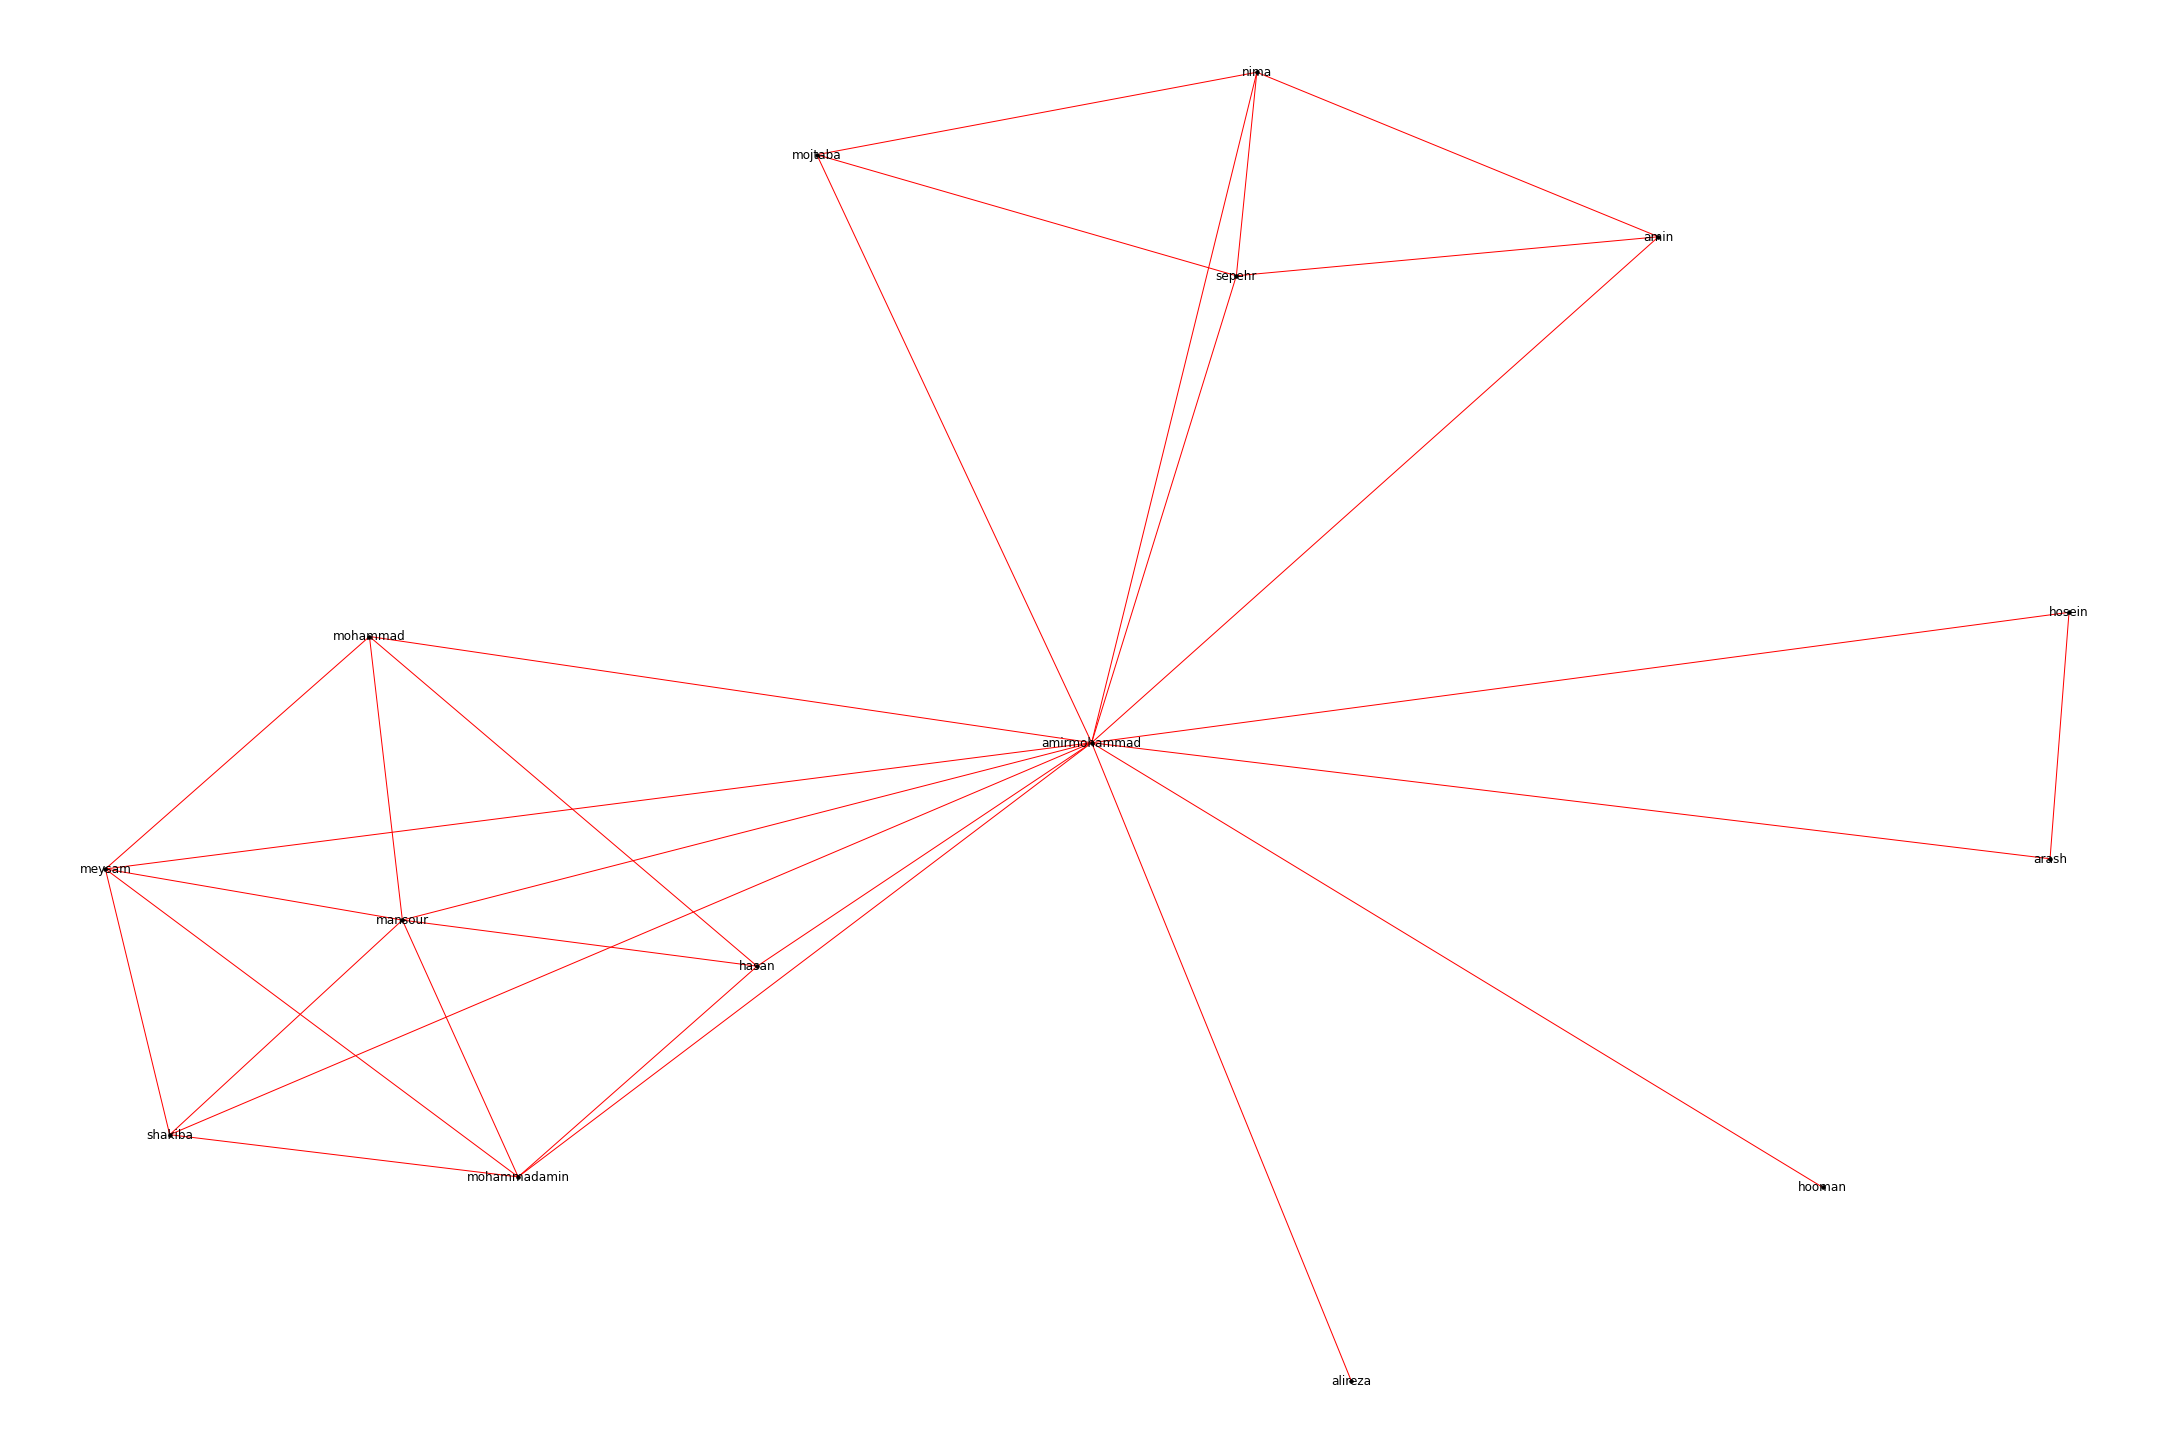

In [92]:
# plot main graph
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))

# create graph
G = nx.Graph()
G.add_edges_from(lines)

nx.draw_spring(G,
               with_labels=True,
               arrows=False,
               alpha=1,
               edge_color='r',
               node_label_size=10,
               node_color='black',
               node_size=12)
nx.number_of_nodes(G)

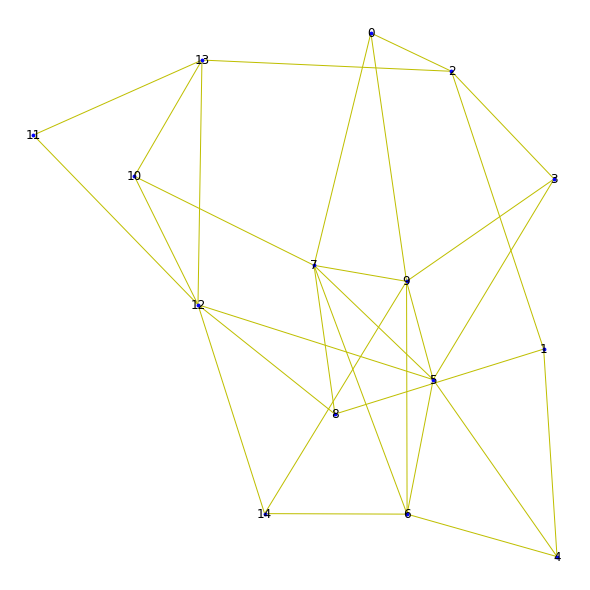

In [6]:
# create WS model
watss_model = nx.watts_strogatz_graph(n=15, k=4, p=0.4)
pos = nx.circular_layout(watss_model)
plt.figure(figsize = (8, 8))
nx.draw_spring(watss_model,
           with_labels=True,
           alpha=1,
           edge_color='y',
           node_label_size=3,
           node_color='b',
           node_size=8)

54


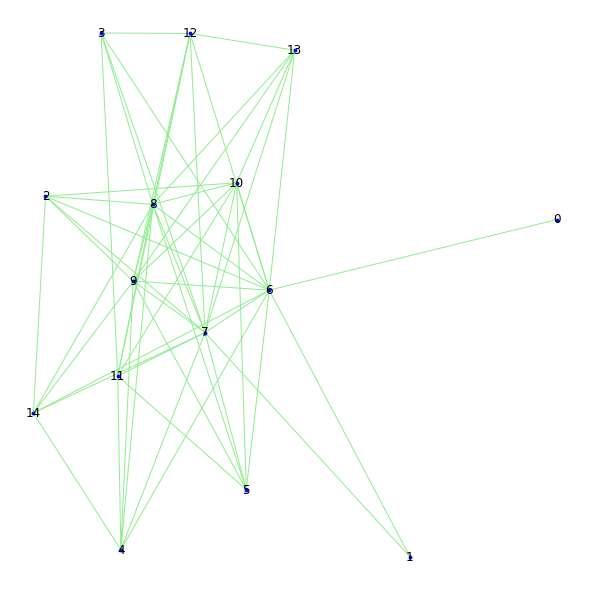

In [36]:
# barabasi model
barabasi_model = nx.barabasi_albert_graph(n=15, m=6, seed=None)

plt.figure(figsize = (8, 8))
nx.draw_spring(barabasi_model,
           with_labels=True,
           alpha=1,
           edge_color='lightgreen',
           node_label_size=3,
           node_color='b',
           node_size=8)
print(len(barabasi_model.edges()))

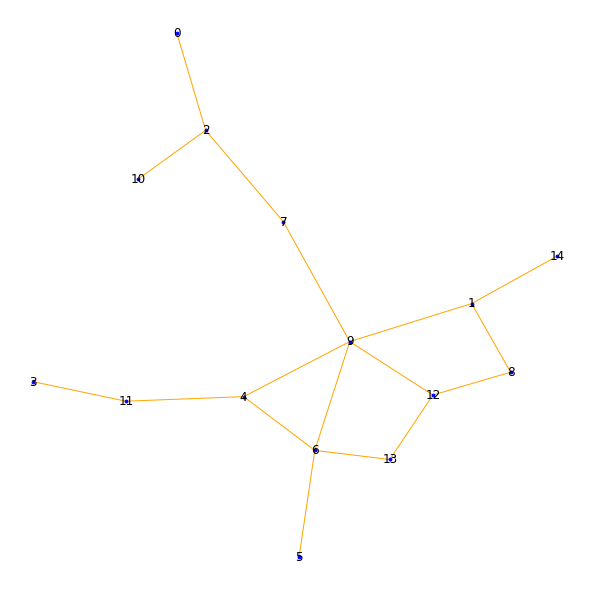

In [13]:
# erdos-reyni model

erdos_model = nx.erdos_renyi_graph(n=15, p=0.2)

plt.figure(figsize = (8, 8))
#     pos = nx.circular_layout(erdos_model)
nx.draw_spring(erdos_model,
           with_labels=True,
           alpha=1,
           edge_color='orange',
           node_label_size=3,
           node_color='b',
           node_size=8)

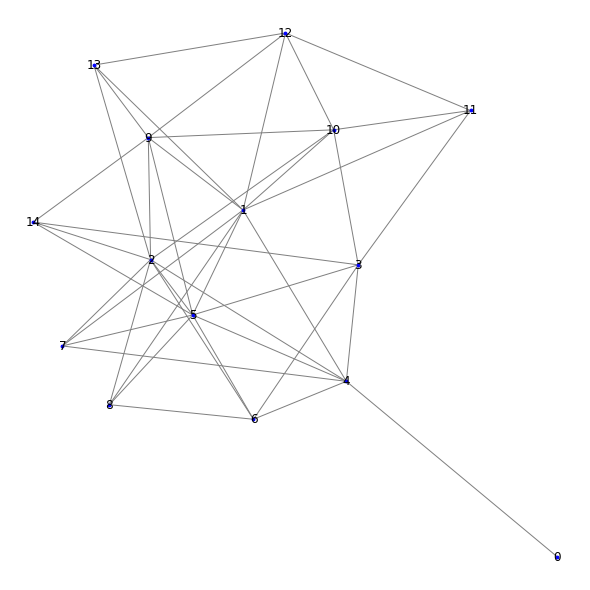

In [82]:
# Holme and kim Model
holme_model = nx.powerlaw_cluster_graph(n=15,m=4, p=0.22)
pos = nx.circular_layout(holme_model)
plt.figure(figsize = (8, 8))
nx.draw_spring(holme_model,
           with_labels=True,
           alpha=1,
           edge_color='gray',
           node_label_size=3,
           node_color='b',
           node_size=8)

# now, let's compute some micro-level metrics

Average Clustering Coefficinet

In [83]:
#compare average clustering
averageClusteringfriendship = nx.average_clustering(G)
averageClusteringErods = nx.average_clustering(erdos_model)
averageClusteringWatss = nx.average_clustering(watss_model)
averageClusteringBarabasi = nx.average_clustering(barabasi_model)
averageClusteringHolme = nx.average_clustering(holme_model)

print('average clustering friendship: ', round(averageClusteringfriendship, 4))
print('average clustering erdos: ', round(averageClusteringErods, 4))
print('average clustering watss: ', round(averageClusteringWatss, 4))
print('average clustering barabasi: ', round(averageClusteringBarabasi, 4))
print('average clustering holme: ', round(averageClusteringHolme, 4))

average clustering friendship:  0.7236
average clustering erdos:  0.04
average clustering watss:  0.3089
average clustering barabasi:  0.7136
average clustering holme:  0.5194


Degree Distribution:

In [41]:
#compare degree distributions
import collections

def plot_degree_distribution(G):
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt)

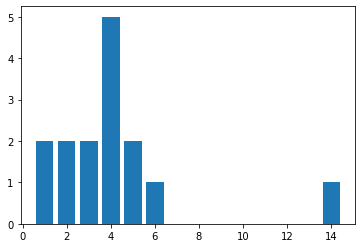

In [42]:
# for friendship network
plot_degree_distribution(G)

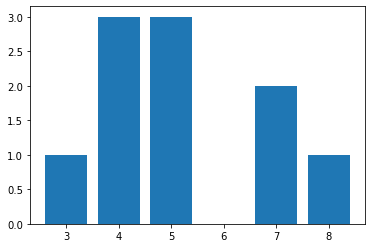

In [43]:
# for erdos-renyi network
plot_degree_distribution(erdos_model)

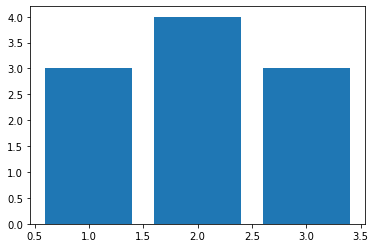

In [44]:
# for wats-strogatz model
plot_degree_distribution(watss_model)

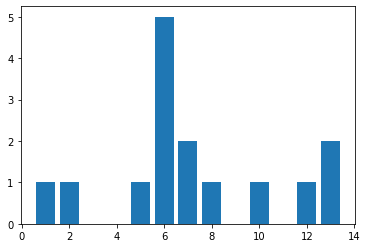

In [43]:
# for barabasi-albert model
plot_degree_distribution(barabasi_model)

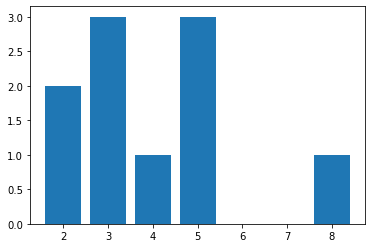

In [46]:
# for Holme-Kim model
plot_degree_distribution(holme_model)

Diameters:

In [84]:
# compare diameters
friendshipDiameter = nx.diameter(G)
erdosDiameter = nx.diameter(erdos_model)
wattsDublinDiameter = nx.diameter(watss_model)
barabasiDublinDiameter = nx.diameter(barabasi_model)
holmeDublinDiameter = nx.diameter(holme_model)

print('friendship diameter: ', round(friendshipDiameter, 4))
print('erdos diameter: ', round(erdosDiameter, 4))
print('watts diameter: ', round(wattsDublinDiameter, 4))
print('barabasi diameter: ', round(barabasiDublinDiameter, 4))
print('holme diameter: ', round(holmeDublinDiameter, 4))

friendship diameter:  2
erdos diameter:  6
watts diameter:  3
barabasi diameter:  3
holme diameter:  3


Density:

In [85]:
# compare densities
friendshipDensity = nx.density(G)
erdosDensity = nx.density(erdos_model)
wattsDensity = nx.density(watss_model)
barabasiDensity = nx.density(barabasi_model)
holmeDensity = nx.density(holme_model)

print('friendship density: ', round(friendshipDensity, 4))
print('erdos density: ', round(erdosDensity, 4))
print('watts density: ', round(wattsDensity, 4))
print('barabasi density: ', round(barabasiDensity, 4))
print('holme density: ', round(holmeDensity, 4))

friendship density:  0.2952
erdos density:  0.1619
watts density:  0.2857
barabasi density:  0.5143
holme density:  0.4


Average Shortest Path:

In [86]:
# compare average shortest path length
friendshipShortetstPathLength = nx.average_shortest_path_length(G)
erdosShortetstPathLength = nx.average_shortest_path_length(erdos_model)
wattsShortetstPathLength = nx.average_shortest_path_length(watss_model)
barabasiShortetstPathLength = nx.average_shortest_path_length(barabasi_model)
holmeShortetstPathLength = nx.average_shortest_path_length(holme_model)

print('friendship shortest path length: ', round(friendshipShortetstPathLength, 4))
print('erdos shortest path length: ', round(erdosShortetstPathLength, 4))
print('watts shortest path length: ', round(wattsShortetstPathLength, 4))
print('barabasi shortest path length: ', round(barabasiShortetstPathLength, 4))
print('holme shortest path length: ', round(holmeShortetstPathLength, 4))

friendship shortest path length:  1.7048
erdos shortest path length:  2.9619
watts shortest path length:  1.9048
barabasi shortest path length:  1.4952
holme shortest path length:  1.6857


assortativity coefficient

In [87]:
# compare assortativity coefficient
friendshipAssortativity = nx.degree_assortativity_coefficient(G)
erdosAssortativity = nx.degree_assortativity_coefficient(erdos_model)
wattsAssortativity = nx.degree_assortativity_coefficient(watss_model)
barabasiAssortativity = nx.degree_assortativity_coefficient(barabasi_model)
holmeAssortativity = nx.degree_assortativity_coefficient(holme_model)

print('friendship assortativity coefficient: ', round(friendshipAssortativity, 4))
print('erdos assortativity coefficient: ', round(erdosAssortativity, 4))
print('watts assortativity coefficient: ', round(wattsAssortativity, 4))
print('barabasi assortativity coefficient: ', round(barabasiAssortativity, 4))
print('holme assortativity coefficient: ', round(holmeAssortativity, 4))

friendship assortativity coefficient:  -0.4067
erdos assortativity coefficient:  -0.0479
watts assortativity coefficient:  -0.1802
barabasi assortativity coefficient:  -0.4435
holme assortativity coefficient:  -0.3146


Transitivity

In [88]:
# compare transitivities
friendshipTransitivity = nx.transitivity(G)
erodsTransitivity = nx.transitivity(erdos_model)
wattsTransitivity = nx.transitivity(watss_model)
barabasiTransitivity = nx.transitivity(barabasi_model)
holmeTransitivity = nx.transitivity(holme_model)

print('friendship transitivity: ', round(friendshipTransitivity, 4))
print('erdos transitivity: ', round(erodsTransitivity, 4))
print('watts transitivity: ', round(wattsTransitivity, 4))
print('barabasi transitivity: ', round(barabasiTransitivity, 4))
print('holme transitivity: ', round(holmeTransitivity, 4))

friendship transitivity:  0.4756
erdos transitivity:  0.0938
watts transitivity:  0.2885
barabasi transitivity:  0.6383
holme transitivity:  0.4696
